In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
#from sklearn.metrics import silhouette_samples, silhouette_score
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

In [60]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Customer_Data (1).csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mahnazarjmand/customer-segmentation",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head(1))

First 5 records:   CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001  40.900749           0.818182       95.4               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4           0.0             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  201.802084        139.509787               0.0      12  


## Exploratory Data Analysis

In [61]:
df.shape

(8950, 18)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [63]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### The columns 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS' have some null values. Imputing the missing values with the mean value of the column. 

In [64]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [65]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [66]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [67]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [68]:
#Dropping off Customer ID column because it is not relevant here
df.drop(columns=["CUST_ID"],axis=1, inplace=True)

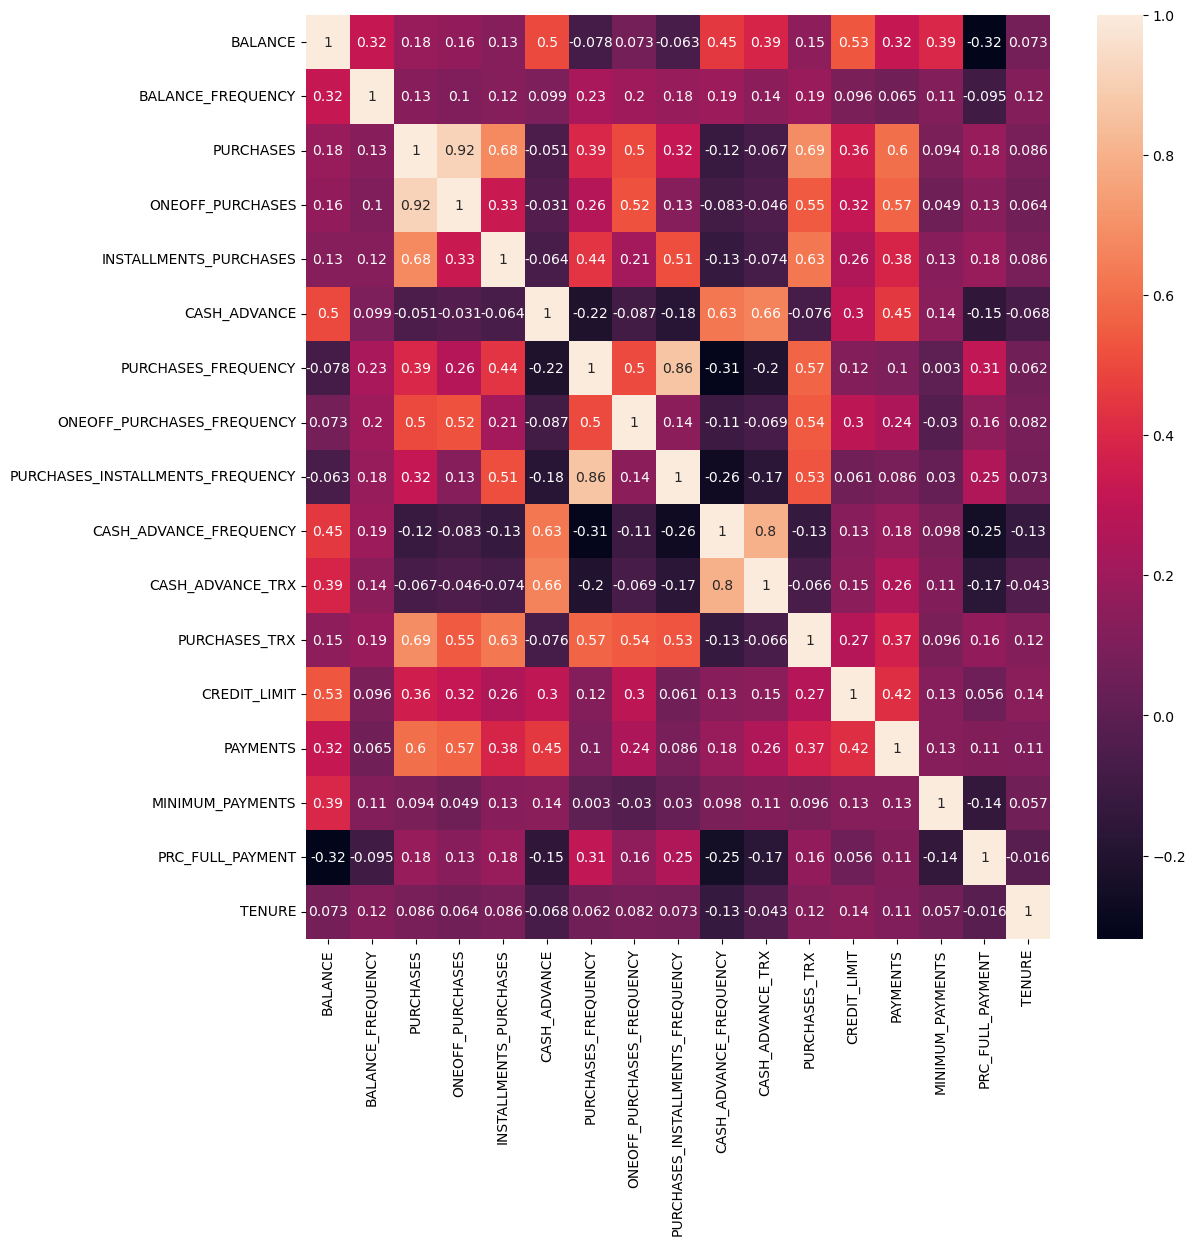

In [69]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Feature Scaling 

In [70]:
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df)

## Model Building using KMeans 

In [72]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)

array([0, 3, 2, ..., 2, 0, 0], dtype=int32)

In [73]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1018.215158,0.790527,270.367351,210.240140,60.393562,601.142327,0.169847,0.086373,0.080243,0.115726,2.146513,2.904917,3280.844903,977.706186,588.245443,0.077617,11.444556
1,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
2,893.453687,0.934482,1235.057483,593.192823,642.138712,211.298199,0.885126,0.296845,0.711922,0.042482,0.789552,22.079846,4211.804765,1331.307846,649.632150,0.269397,11.595726
3,4621.396904,0.968488,504.475312,321.767462,182.793575,4540.928501,0.288831,0.139442,0.186409,0.485645,14.340641,7.705734,7582.002146,3497.664445,2017.516099,0.034995,11.389545


## Principal Component Analysis to Visualize the Clusters

In [79]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_result,columns=["PCA1","PCA2"])
pca_df_means = pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [81]:
pca_df_means

,PCA1,PCA2,cluster
0,-1.682219,-1.076457,0
1,-1.138291,2.506463,3
2,0.969704,-0.383540,2
3,-0.873627,0.043159,0
4,-1.599433,-0.688584,0
...,...,...,...
8945,-0.359631,-2.016144,2
8946,-0.564364,-1.639129,2
8947,-0.926204,-1.810786,2
8948,-2.336559,-0.657957,0


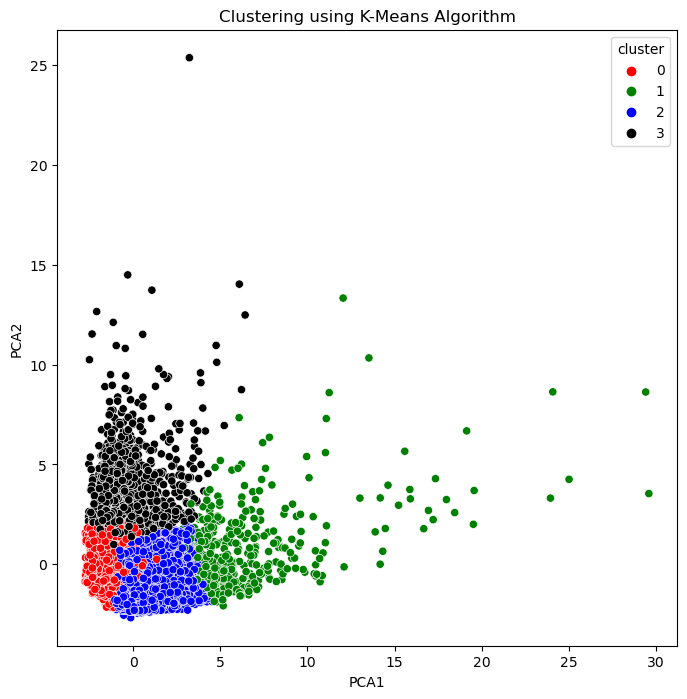

In [80]:
# Scatter plot of clusters
plt.figure(figsize=(8, 8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_means,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [24]:
# Creating a target column "Cluster" for storing the cluster segment for each record
cluster_df = pd.concat([df,pd.DataFrame({'CLUSTER':kmeans_model.labels_})], axis=1)
cluster_df


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [30]:
cluster_0_df = cluster_df[cluster_df["CLUSTER"]==0]
cluster_1_df = cluster_df[cluster_df["CLUSTER"]==1]
cluster_2_df = cluster_df[cluster_df["CLUSTER"]==2]
cluster_3_df = cluster_df[cluster_df["CLUSTER"]==3]

<AxesSubplot:xlabel='CLUSTER', ylabel='count'>

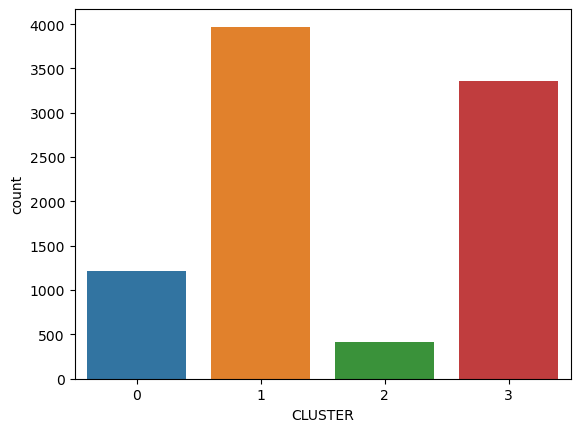

In [32]:
sns.countplot(x="CLUSTER", data=cluster_df)

### We are now going to turn this unsupervised learning problem to a supervised learning problem by treating the CLUSTER column value as the target variable, that our supervised learning model should predict.

## Decision Tree model 

In [85]:
#Split Dataset
X = cluster_df.drop(['CLUSTER'],axis=1)
y = cluster_df['CLUSTER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [86]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6265, 17), (2685, 17), (6265,), (2685,))

In [87]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [89]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 314   29    2   12]
 [  19 1160    0   28]
 [   2    0  108   20]
 [  12   32    8  939]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       357
           1       0.95      0.96      0.96      1207
           2       0.92      0.83      0.87       130
           3       0.94      0.95      0.94       991

    accuracy                           0.94      2685
   macro avg       0.93      0.90      0.92      2685
weighted avg       0.94      0.94      0.94      2685



In [90]:
print("Test Accuracy using Decision Tree: {}".format(model.score(X_test,y_test)))

Test Accuracy using Decision Tree: 0.9389199255121042


### Data Insights 

In [92]:
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importances)

                             feature  importance
6                PURCHASES_FREQUENCY    0.467541
5                       CASH_ADVANCE    0.175925
2                          PURCHASES    0.098157
0                            BALANCE    0.065916
10                  CASH_ADVANCE_TRX    0.061788
11                     PURCHASES_TRX    0.032511
12                      CREDIT_LIMIT    0.021369
9             CASH_ADVANCE_FREQUENCY    0.014444
14                  MINIMUM_PAYMENTS    0.012693
4             INSTALLMENTS_PURCHASES    0.012174
15                  PRC_FULL_PAYMENT    0.009313
13                          PAYMENTS    0.008465
8   PURCHASES_INSTALLMENTS_FREQUENCY    0.007340
1                  BALANCE_FREQUENCY    0.006517
7         ONEOFF_PURCHASES_FREQUENCY    0.003127
3                   ONEOFF_PURCHASES    0.001638
16                            TENURE    0.001081


So, PURCHASE_FREQUENCY is the strongest driver in determining cluster separation, followed by CASH_ADVANCE and PURCHASES. 

In [93]:
cluster_summary = cluster_df.groupby('CLUSTER')[
    ['PURCHASES_FREQUENCY', 'CASH_ADVANCE', 'PURCHASES']
].mean().round(2)

print(cluster_summary)

         PURCHASES_FREQUENCY  CASH_ADVANCE  PURCHASES
CLUSTER                                              
0                       0.28       4480.71     492.40
1                       0.17        588.08     270.73
2                       0.95        686.68    7680.43
3                       0.89        211.26    1238.78


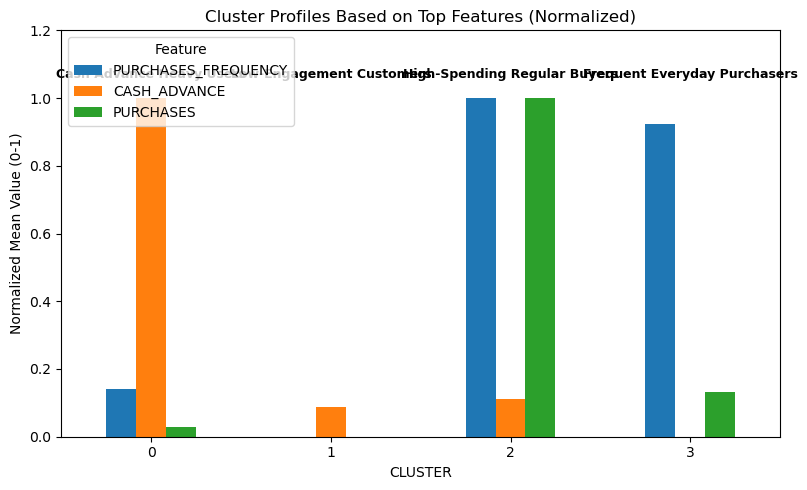

In [98]:
# Normalize each column so they are comparable (0 to 1)
cluster_summary_normalized = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())


# Plot the normalized version
cluster_summary_normalized.plot(kind='bar', figsize=(8, 5))
plt.title("Cluster Profiles Based on Top Features (Normalized)")
plt.ylabel("Normalized Mean Value (0-1)")
plt.xticks(rotation=0)
plt.legend(title="Feature")
plt.tight_layout()

plt.show()